# Python -10
### Draw candlestick chart

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import urllib.request
import json
import warnings 
warnings.filterwarnings("ignore")

In [7]:
def import_data(function, symbol, interval, size, key_name, api):
    if function == 'TIME_SERIES_INTRADAY':
        url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol+'&interval='+ interval +'&outputsize=' +outputsize +'&apikey='+ my_api
    if function == 'TIME_SERIES_DAILY':
        url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol +'&outputsize=' +outputsize +'&apikey='+ my_api
    f = urllib.request.urlopen(url)
    dat = f.read()
    js = dat.decode('utf8')
    f.close()
    parse_data = json.loads(js)
    ps = parse_data[key_name]
    df = pd.DataFrame.from_dict(ps, orient = 'index') #'column'
    df.columns  = ['Open','High','Low','Close','Volume']
    return df

In [8]:
def data_clean(df):
    cols = df.columns
    df[cols] = df[cols].apply(pd.to_numeric, errors= 'coerce')
    df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')
    return df

In [9]:
my_api = 'WWD1GC9C8WI8PRW9'
function= 'TIME_SERIES_DAILY'
symbol_list= ['AAPL','MSFT','GOOG','FB']
interval= '1min'
outputsize= 'compact'
key_name= 'Time Series (Daily)'


stock_list= {}
for symbol in symbol_list:
    temp_dat= import_data(function, symbol, interval, outputsize, key_name, my_api)
    stock_list[symbol]= data_clean(temp_dat)
    
stock_list.keys()

dict_keys(['AAPL', 'MSFT', 'GOOG', 'FB'])

In [11]:
!pip3 install --user mpl_finance

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/1e/f8/4aba1144dad8c67db060049d1a8bc740ad9fa35288d21b82bb85de69ff15/matplotlib-3.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/69/a7/88719d132b18300b4369fbffa741841cfd36d1e637e1990f27929945b538/kiwisolver-1.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/4a/f06b45ab9690d4c37641ec776f7ad691974f4cf6943a73267475b05cbfca/pyparsing-2.2.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/68/d87d9b36af36f44254a8d512cbfc48369103a3b9e474be9bdfe536abfc45/python_dateutil-2.7.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/21/2e88568c13

In [10]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num
from mpl_finance import candlestick_ohlc
import numpy as np

## candlestick_ohlc documentation

https://matplotlib.org/api/finance_api.html


matplotlib.finance.candlestick_ohlc(ax, <-- Axes, must have

                                    quote, <-- Sequene of(time, open, high, low...) must be in float days format
                                    
                                    width= 0.2, 
                                    
                                    colorup= 'k', 
                                    
                                    colordown= 'r',
                                    
                                    alpha= 1.0)
                                    

A sequence of sequencies:
[(index1, open1, high1, low1, close1), (index2, open2, high2, low2, close2),...,(indexN, openN, highN, lowN, closeN)]


In [11]:
data= stock_list['AAPL']
data.head()

,Open,High,Low,Close,Volume
2018-06-11,191.350,191.970,190.21,191.23,18308460
2018-06-12,191.385,192.611,191.15,192.28,16911141
2018-06-13,192.420,192.880,190.44,190.70,21638393
2018-06-14,191.550,191.570,190.22,190.80,21610074
2018-06-15,190.030,190.160,188.26,188.84,61719160


In [16]:
list1= [1,2,3]
list2= [3,4,5]
list3= [9,8,7]

#The zip() function take iterables (can be zero or more), 
#makes iterator that aggregates elements based on the iterables passed, and returns an iterator of tuples. 

list(zip(list1,list2,list3))

[(1, 3, 9), (2, 4, 8), (3, 5, 7)]

In [18]:
quotes= list(zip(list(date2num(data.index.tolist())),
                 data['Open'].tolist(), data['High'].tolist(), 
                 data['Low'].tolist(), data['Close'].tolist()))
#tolist() turn the whole data into list

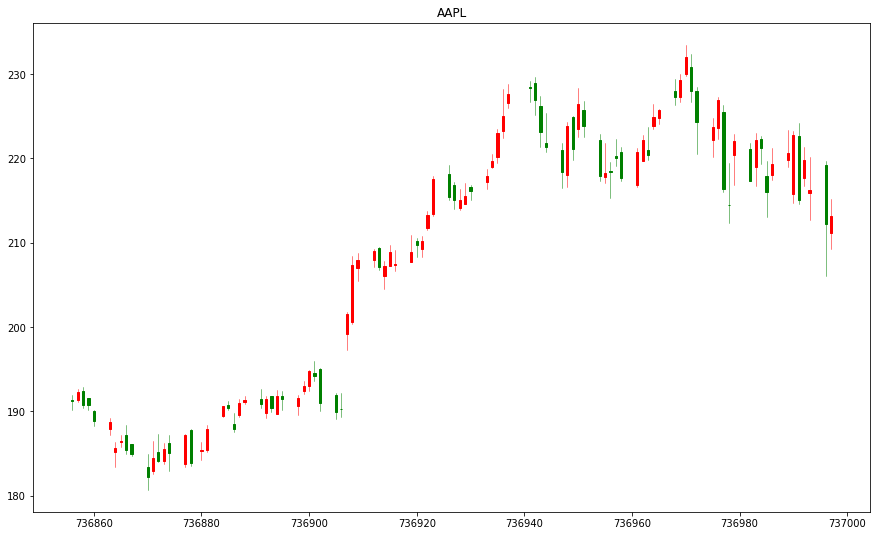

In [19]:
fig= plt.figure(figsize= (15,9))
ax= fig.add_subplot(1,1,1)
candlestick_ohlc(ax, quotes, colorup= 'red', colordown= 'green', width= 1*.4)
plt.title('AAPL')
plt.show()

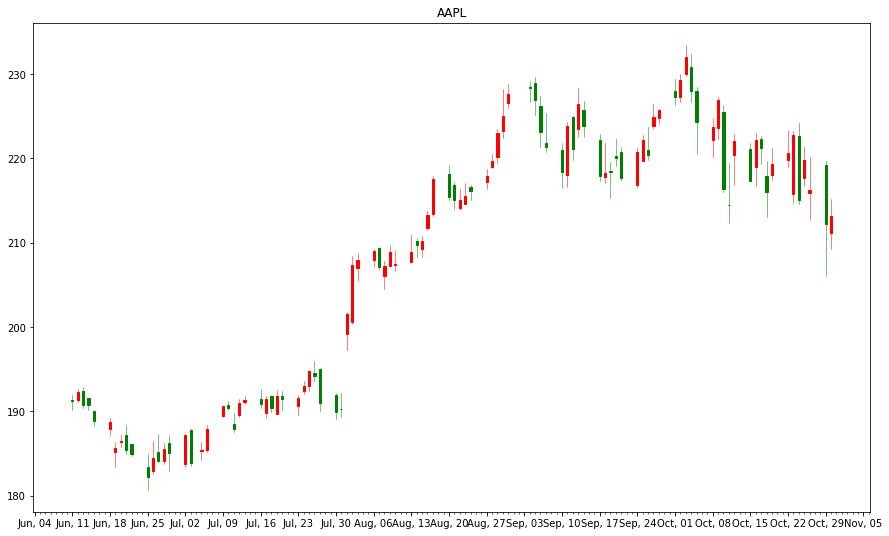

In [21]:
# change the x axis
# locate to which day, MONDAY means showing every monday
mondays= WeekdayLocator(MONDAY) 
#day for each interval
alldays= DayLocator() 
#DateFormatter = format date, %b= month in english, %d= day in number
weekFormatter= DateFormatter("%b, %d")


fig= plt.figure(figsize= (15,9))
ax= fig.add_subplot(1,1,1)

# use the above setting on x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)


candlestick_ohlc(ax, quotes, colorup= 'red', colordown= 'green', width= 1*.4)
plt.title('AAPL')
plt.show()

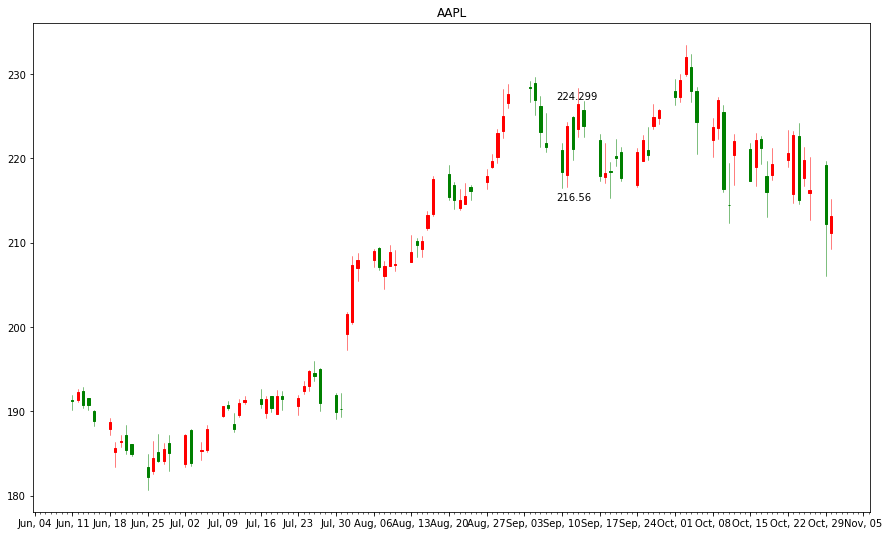

In [23]:
# change the x axis
# locate to which day, MONDAY means showing every monday
mondays= WeekdayLocator(MONDAY) 
#day for each interval
alldays= DayLocator() 
#DateFormatter = format date, %b= month in english, %d= day in number
weekFormatter= DateFormatter("%b, %d")


fig= plt.figure(figsize= (15,9))
ax= fig.add_subplot(1,1,1)

# use the above setting on x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# add comment on the chart
dt= date2num(pd.to_datetime('2018-09-11', format= '%Y-%m-%d'))
ax.annotate(str(data.loc['2018-09-11','High']), xy= (dt-2,227))
ax.annotate(str(data.loc['2018-09-11','Low']), xy= (dt-2,215))

candlestick_ohlc(ax, quotes, colorup= 'red', colordown= 'green', width= 1*.4)
plt.title('AAPL')
plt.show()

In [24]:
def draw_candlestick(data, ticker, label_date= None, x1= 0, x2= 0):
    # locate to which day, MONDAY means showing every monday
    mondays= WeekdayLocator(MONDAY) 
    #day for each interval
    alldays= DayLocator() 
    #DateFormatter = format date, %b= month in english, %d= day in number
    weekFormatter= DateFormatter("%b, %d") #--> e.g. Oct 12,2018
    
    fig= plt.figure(figsize= (15,9))
    ax= fig.add_subplot(1,1,1)
    
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    
    quotes= list(zip(list(date2num(data.index.tolist())),
                 data['Open'].tolist(), data['High'].tolist(), 
                 data['Low'].tolist(), data['Close'].tolist()))
    
    
    candlestick_ohlc(ax, quotes, colorup= 'red', colordown= 'green', width= 1*.4)
    
    if label_date != None:
        dt= date2num(pd.to_datetime(label_date, format= '%Y-%m-%d'))
        ax.annotate(str(data.loc[label_date,'High']), xy= (dt-5,x1))
        ax.annotate(str(data.loc[label_date,'Low']), xy= (dt-5,x2))
        
    plt.title(ticker)
    plt.show()

## datetime

https://docs.python.org/3/library/datetime.html

date.isocalendar()

return 3-tuple( year, week number, weekday)


In [50]:
data['week']= pd.to_datetime(data.index).map(lambda x: x.isocalendar()[1])
data.head(10)

,Open,High,Low,Close,Volume,week
2018-06-11,188.8100,192.60,188.800,191.54,12928907,24
2018-06-12,192.1700,193.28,191.560,192.40,11562704,24
2018-06-13,192.7400,194.50,191.910,192.41,15853821,24
2018-06-14,193.1000,197.28,192.910,196.81,19120866,24
2018-06-15,195.7900,197.07,194.640,195.85,21860931,24
2018-06-18,194.8000,199.58,194.130,198.31,16826023,25
2018-06-19,196.2352,197.96,193.790,197.49,19993996,25
2018-06-20,199.1000,203.55,198.805,202.00,28230933,25
2018-06-21,202.7600,203.39,200.090,201.50,19045717,25
2018-06-22,201.1600,202.24,199.310,201.74,17420188,25


## groupby

divide a dataframe into serval small dataframe

In [30]:
data['week']= pd.to_datetime(data.index).map(lambda x: x.isocalendar()[1])
grouped= data.groupby(['week'])
#print(grouped)
for i, x in grouped:
    print(i) #<-- the standard for grouping
    print(x) #<-- what is look like after grouping

24
               Open     High     Low   Close    Volume  week
2018-06-11  191.350  191.970  190.21  191.23  18308460    24
2018-06-12  191.385  192.611  191.15  192.28  16911141    24
2018-06-13  192.420  192.880  190.44  190.70  21638393    24
2018-06-14  191.550  191.570  190.22  190.80  21610074    24
2018-06-15  190.030  190.160  188.26  188.84  61719160    24
25
              Open    High     Low   Close    Volume  week
2018-06-18  187.88  189.22  187.20  188.74  18484865    25
2018-06-19  185.14  186.33  183.45  185.69  33578455    25
2018-06-20  186.35  187.20  185.73  186.50  20628701    25
2018-06-21  187.25  188.35  184.94  185.46  25711898    25
2018-06-22  186.12  186.15  184.70  184.92  27200447    25
26
                Open    High     Low   Close    Volume  week
2018-06-25  183.4000  184.92  180.73  182.17  31663096    26
2018-06-26  182.9900  186.53  182.54  184.43  24569201    26
2018-06-27  185.2278  187.28  184.03  184.16  25285328    26
2018-06-28  184.1000  186.2

In [31]:
type(grouped)

pandas.core.groupby.groupby.DataFrameGroupBy

## when the data displayed as week, month, year

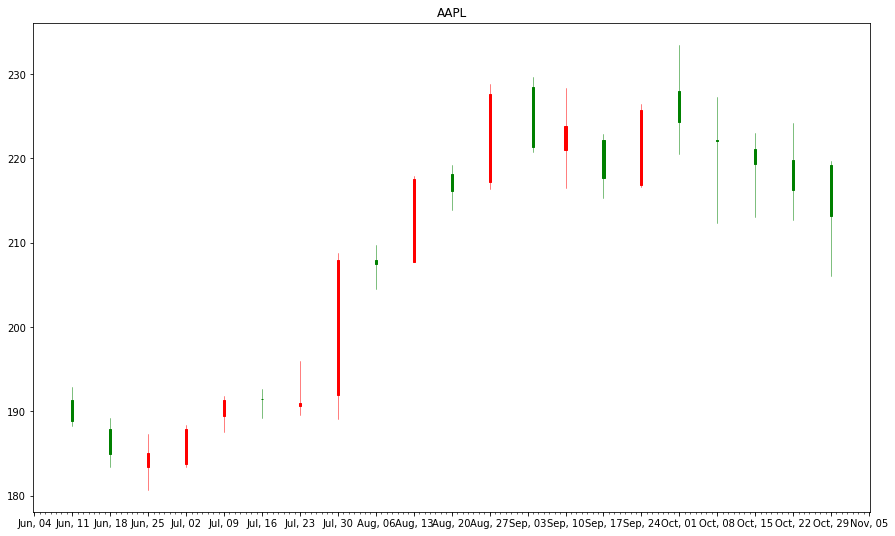

In [33]:
plotdata= pd.DataFrame({'Open':[],'High':[],'Low':[],'Close':[]})

for i, x in grouped:
    plotdata= plotdata.append(pd.DataFrame({'Open':x.iloc[0,0],
                                            'High':max(x.High),
                                            'Low':min(x.Low),
                                            'Close':x.iloc[-1,3]},
                                          index= [x.index[0]]))
# draw_candlestick(data, ticker, label_date= None, x1= 0, x2= 0)   
draw_candlestick(plotdata, 'AAPL', label_date= None, x1= 0, x2= 0)

## Rolling()

rolling() <-- calculate Moving Average (MA)

windows <-- how many days for MA

In [36]:
data['7d']= data['Close'].rolling(window= 7, center= False).mean()
data.head(15)

,Open,High,Low,Close,Volume,week,7d
2018-06-11,191.3500,191.970,190.21,191.23,18308460,24,NaN
2018-06-12,191.3850,192.611,191.15,192.28,16911141,24,NaN
2018-06-13,192.4200,192.880,190.44,190.70,21638393,24,NaN
2018-06-14,191.5500,191.570,190.22,190.80,21610074,24,NaN
2018-06-15,190.0300,190.160,188.26,188.84,61719160,24,NaN
2018-06-18,187.8800,189.220,187.20,188.74,18484865,25,NaN
2018-06-19,185.1400,186.330,183.45,185.69,33578455,25,189.754286
2018-06-20,186.3500,187.200,185.73,186.50,20628701,25,189.078571
2018-06-21,187.2500,188.350,184.94,185.46,25711898,25,188.104286
2018-06-22,186.1200,186.150,184.70,184.92,27200447,25,187.278571


## Excerise 1

In [45]:
# function for retrive data
def import_data(function, symbol, interval, size, key_name, api):
    if function == 'TIME_SERIES_INTRADAY':
        url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol+'&interval='+ interval +'&outputsize=' +outputsize +'&apikey='+ my_api
    if function == 'TIME_SERIES_DAILY':
        url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol +'&outputsize=' +outputsize +'&apikey='+ my_api
    f = urllib.request.urlopen(url)
    dat = f.read()
    js = dat.decode('utf8')
    f.close()
    parse_data = json.loads(js)
   # print(parse_data.keys())
    ps = parse_data[key_name]
    df = pd.DataFrame.from_dict(ps, orient = 'index') #'column'
    df.columns  = ['Open','High','Low','Close','Volume']
    return df

In [46]:
# function for change datetime from string to numeric
def data_clean(df):
    cols = df.columns
    df[cols] = df[cols].apply(pd.to_numeric, errors= 'coerce')
    df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')
    return df

In [60]:
function= 'TIME_SERIES_DAILY'
symbol= 'FB'
interval=''
outputsize= 'compact'
key_name= 'Time Series (Daily)'
data= data_clean(import_data(function,symbol, interval, outputsize, key_name,my_api))
data.head(10)

,Open,High,Low,Close,Volume
2018-06-11,188.8100,192.60,188.800,191.54,12928907
2018-06-12,192.1700,193.28,191.560,192.40,11562704
2018-06-13,192.7400,194.50,191.910,192.41,15853821
2018-06-14,193.1000,197.28,192.910,196.81,19120866
2018-06-15,195.7900,197.07,194.640,195.85,21860931
2018-06-18,194.8000,199.58,194.130,198.31,16826023
2018-06-19,196.2352,197.96,193.790,197.49,19993996
2018-06-20,199.1000,203.55,198.805,202.00,28230933
2018-06-21,202.7600,203.39,200.090,201.50,19045717
2018-06-22,201.1600,202.24,199.310,201.74,17420188


## Excerise 2

In [71]:
from matplotlib.dates import MonthLocator

In [79]:
def draw_candlestick(data, ticker, label_date= None, x1= 0, x2= 0):
    # locate to which day, MONDAY means showing every monday
    month= MonthLocator() 
    #day for each interval
    alldays= DayLocator() 
    #DateFormatter = format date, %b= month in english, %d= day in number
    formatter= DateFormatter("%b") #--> e.g. Oct 12,2018
    
    fig= plt.figure(figsize= (20,5))
    ax= fig.add_subplot(1,1,1)
    
    ax.xaxis.set_major_locator(month)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(formatter)
    
    
    quotes= list(zip(list(date2num(data.index.tolist())),
                 data['Open'].tolist(), data['High'].tolist(), 
                 data['Low'].tolist(), data['Close'].tolist()))
    
    
    candlestick_ohlc(ax, quotes, colorup= 'red', colordown= 'green', width= 5)
    
    if label_date != None:
        dt= date2num(pd.to_datetime(label_date, format= '%Y-%m-%d'))
        ax.annotate(str(data.loc[label_date,'High']), xy= (dt-5,x1))
        ax.annotate(str(data.loc[label_date,'Low']), xy= (dt-5,x2))
        
    plt.title(ticker)
    plt.show()

In [80]:
data['month'] = pd.to_datetime(data.index).map(lambda x: x.month)
grouped= data.groupby(['month'])
for m, d in grouped:
    print(m)
    print(d)

6
                Open      High      Low   Close    Volume  month
2018-06-11  188.8100  192.6000  188.800  191.54  12928907      6
2018-06-12  192.1700  193.2800  191.560  192.40  11562704      6
2018-06-13  192.7400  194.5000  191.910  192.41  15853821      6
2018-06-14  193.1000  197.2800  192.910  196.81  19120866      6
2018-06-15  195.7900  197.0700  194.640  195.85  21860931      6
2018-06-18  194.8000  199.5800  194.130  198.31  16826023      6
2018-06-19  196.2352  197.9600  193.790  197.49  19993996      6
2018-06-20  199.1000  203.5500  198.805  202.00  28230933      6
2018-06-21  202.7600  203.3900  200.090  201.50  19045717      6
2018-06-22  201.1600  202.2400  199.310  201.74  17420188      6
2018-06-25  200.0000  200.0000  193.110  196.35  25275137      6
2018-06-26  197.6000  199.1000  196.230  199.00  17897576      6
2018-06-27  199.1800  200.7500  195.800  195.84  18734408      6
2018-06-28  195.1800  197.3400  193.260  196.23  18172439      6
2018-06-29  197.3200  1

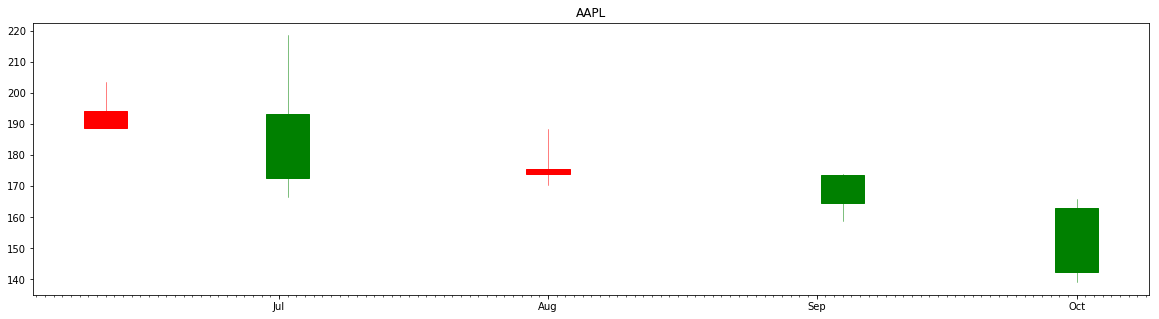

In [81]:
plotdata= pd.DataFrame({'Open':[],'High':[],'Low':[],'Close':[]})

for m, x in grouped:
    plotdata= plotdata.append(pd.DataFrame({'Open':x.iloc[0,0],
                                            'High':max(x.High),
                                            'Low':min(x.Low),
                                            'Close':x.iloc[-1,3]},
                                          index= [x.index[0]]))
# draw_candlestick(data, ticker, label_date= None, x1= 0, x2= 0)   
draw_candlestick(plotdata, 'AAPL', label_date= None, x1= 0, x2= 0)